# Chapitre 4:-*Scipy*
## 4.1 Interpolation

Des fois on récolte les données avec 2 capteur le premier récolte 2 fois par seconde et l'autre récolte 4 fois par seconde ceci engendre des manques de données.

### 4.1.1 Cas non bruité

In [18]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

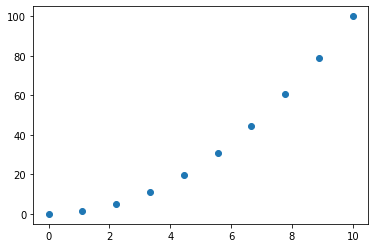

In [19]:
x=np.linspace(0,10,10)
y=x**2
plt.scatter(x,y)
plt.show()

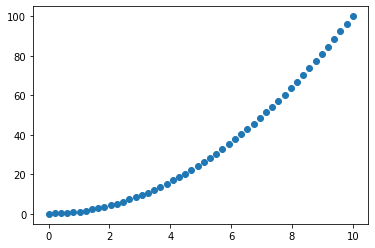

In [20]:
f=interp1d(x,y, kind='linear')
new_x=np.linspace(0,10,50)
f(new_x)
plt.scatter(new_x, f(new_x))

### 4.1.2 Cas bruité
Methode de Régression en utilisant la métode des moindre carré.

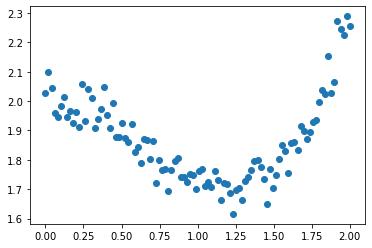

In [21]:
x=np.linspace(0, 2, 100)
noise=np.random.randn(x.shape[0])/20
y = 1/3 * x**3 - 3/5 * x**2 + 2 + noise
plt.scatter(x,y)


Utilisation de la méthode des moindres carrés pour trouver les bon paramètres d'un modèle f


In [22]:
from scipy import optimize

def f( x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

(params, params_cov) = optimize.curve_fit(f, x, y)

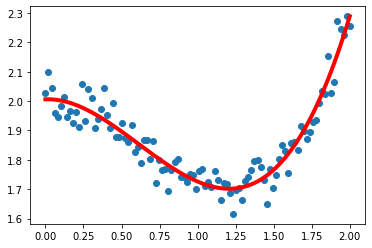

In [23]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c="red", lw=4)
plt.show()

**Trouver Le minimum Global :**

En générale le probleme de minimisation est utilisé lorsqu'on veut trouvé le meilleur score lorsqu'on passe certaines paramétre du programe ML.

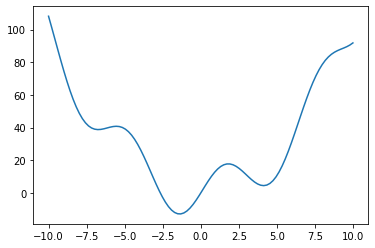

In [24]:
def f(x):
    return x**2 + 15*np.sin(x)

x=np.linspace(-10, 10, 100)
plt.plot(x,f(x))


In [25]:
x0=-5
x_min=optimize.minimize(f, x0=-5).x
x_min

array([-1.38505583])

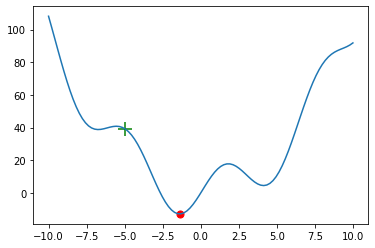

In [26]:
plt.plot(x,f(x))
plt.scatter(x_min,f(x_min),c="red",marker=".", s=200)#point de départ
plt.scatter(x0,f(x0),c="green",marker='+', s=200)#minimum Global

## 4.2 Traitement des Signaux

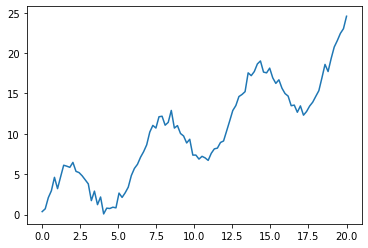

In [27]:
x= np.linspace(0,20,100)
y= x + 4 * np.sin(x)+ np.random.randn(x.shape[0])/2
plt.plot(x,y)

**Méthode 1:** -*Signal Non Periodique*.

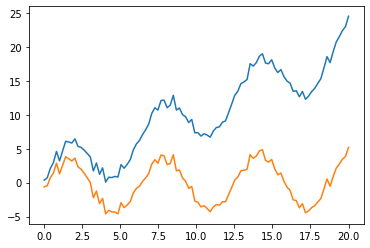

In [28]:
from scipy import signal
y_new = signal.detrend(y)
plt.plot(x, y)
plt.plot(x, y_new)

**Méthode 2:** -*Signal Periodique*.

Utilisation de la transformé de fourrier :

C'est une mèthode qui extrait les fréquences des siganux qui constitu le signal original. Cela nous permet de gardé seulement les frequences qu'on a besoin(significatif et utile lors de l'entrainement ou prediction).

In [29]:
from scipy import fftpack

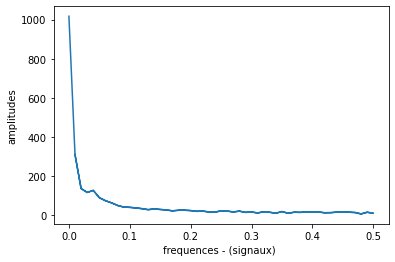

In [30]:
four = fftpack.fft(y)
amp = np.abs(four)
freq = np.abs(fftpack.fftfreq(y.size))

plt.plot(freq, amp)
plt.xlabel("frequences - (signaux) ")
plt.ylabel("amplitudes")
plt.show()

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


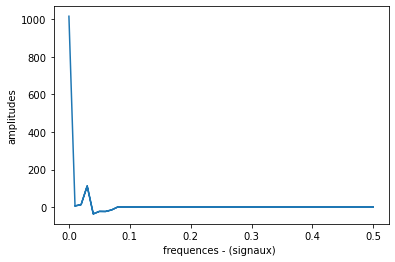

In [53]:
four[amp<50] = 0
plt.plot(freq, four)
plt.xlabel("frequences - (signaux) ")
plt.ylabel("amplitudes")
plt.show()

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


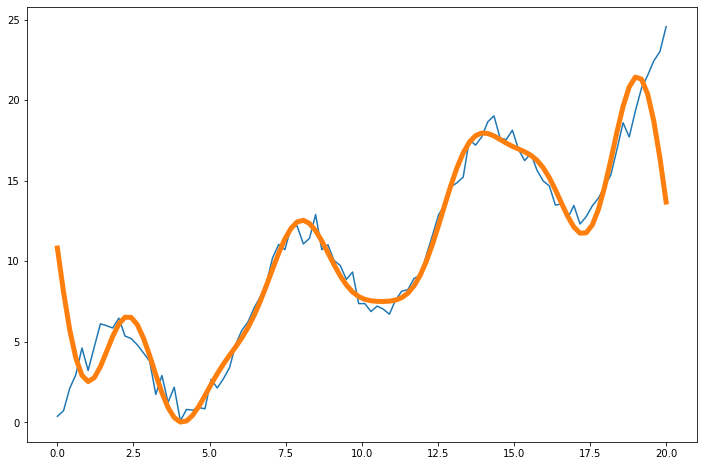

In [32]:
signal=fftpack.ifft(four)
plt.figure(figsize=(12,8))
plt.plot(x, y)
plt.plot(x, signal,lw=5)

## 4.3 Traitement des images

### 4.3.1 Application des filtres sur des images


Dilation imprime les images - l'érosion efface les pixels

In [33]:
from scipy import ndimage

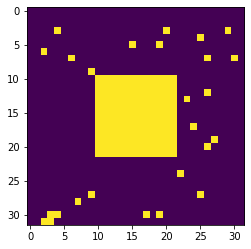

In [34]:
aray_gen=np.random.RandomState(seed =0)
#Création de image
X=np.zeros((32,32))
X[10:-10, 10:-10]=1
#Création du bruit
X[np.random.randint(2,32,30), np.random.randint(2,32,30)]=1
plt.imshow(X)

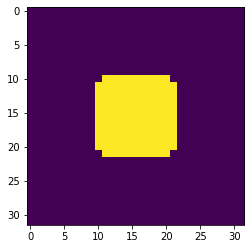

In [35]:
open_x=ndimage.binary_opening(X)
plt.imshow(open_x)

Extraction des informations

(740, 1300)

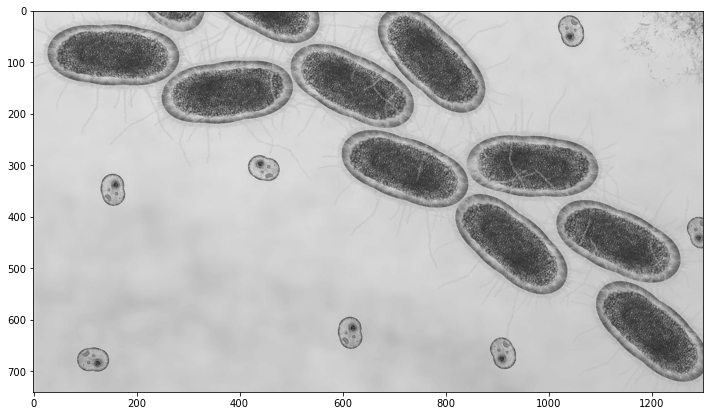

In [36]:
img=plt.imread("src/imgs/bacteries.jpeg")
img=img[:,:,0]
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
img.shape

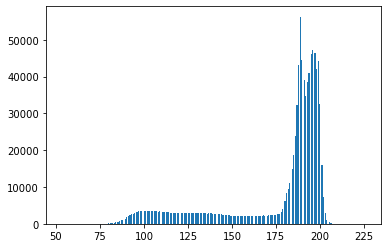

In [55]:
plt.hist(img.ravel(), bins=255)
plt.show()

(740, 1300)

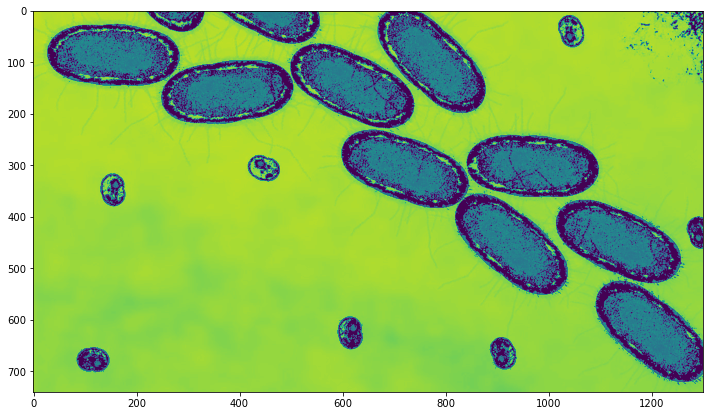

In [69]:
imgc=np.copy(img)
imgc[(imgc >125) & (imgc < 175)]=0
plt.figure(figsize=(12,8))
plt.imshow(imgc)
imgc.shape

(740, 1300)

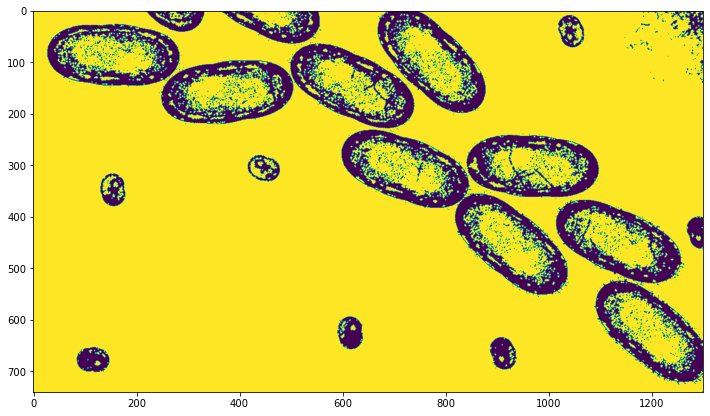

In [70]:
imgc=ndimage.binary_opening(imgc)
plt.figure(figsize=(12,8))
plt.imshow(imgc)
imgc.shape

On utilise une fonction **ndimage.label** :
Pour reperer les artefacts afin d'affectué a chaque bactérie un libéllé. Elle renvoie aussi le nombre de libellé attribué.

[[0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 0]] 1021


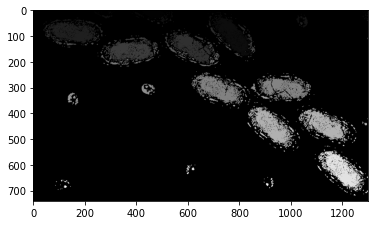

In [73]:
label, num_label=ndimage.label(imgc)
print(label, num_label)
plt.imshow(label ,cmap="gray")

## 4.3 Pré-Processing

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [43]:
data=pd.read_excel('src/datasets/covid.xlsx')

In [44]:
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 4.3.1 Analyse de la forme des données

In [45]:
data_copy = data.copy()

In [46]:
missing_rate = data_copy.isna().sum()/data_copy.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu